In [19]:
import pandas as pd
import numpy as np
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from IPython.display import display
from geopy.distance import geodesic
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# %load_ext autoreload
# %autoreload 2

## Yagiz and Tugba code

In [2]:
beers = pd.read_csv("dataset/FilteredData/beers.csv")
breweries = pd.read_csv("dataset/FilteredData/breweries.csv")
ratings = pd.read_csv("dataset/FilteredData/ratings.csv", dtype = {'user_id': str})
users = pd.read_csv("dataset/FilteredData/users.csv", dtype = {'user_id': str})

STYLE MOST CONSUMED BY YEAR - ONLY 1

In [3]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc['popularity_percentage'].idxmax()
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    most_popular_styles_by_location = most_popular_styles_by_location[['location', 'style']]
    most_popular_styles_by_location.set_index('location', inplace = True)
    most_popular_styles_by_location = most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, most_popular_styles_by_location], axis = 1)

style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),American Pale Ale,American Pale Ale,India Pale Ale (IPA)
Belgium,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Ale,Belgian Ale,Belgian Ale,Imperial Stout
Brazil,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
Canada,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),Pale Lager,American Pale Ale,Saison,Saison,Sour/Wild Ale
Croatia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pilsener,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, Washington",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, West Virginia",India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),Pale Lager,Saison


STYLE MOST CONSUMED BY YEAR - TOP 3

In [4]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'popularity_percentage')).index.values
    idx_most_popular = [x[1] for x in idx_most_popular]
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    three_most_popular_styles_by_location = most_popular_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_most_popular_styles_by_location = three_most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, three_most_popular_styles_by_location], axis = 1)
    
style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, Golden Ale/Blond Ale, American Pa...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale...","[India Pale Ale (IPA), American Pale Ale, Pale...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale..."
Belgium,"[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Pale Lager]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Saison]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Imperial Stout, Belgian Ale, Belgian Strong Ale]"
Brazil,"[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Belgian Ale]","[Pale Lager, Pilsener, Belgian Strong Ale]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl..."
Canada,"[Pale Lager, Golden Ale/Blond Ale, Fruit Beer]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, India Pale Ale (IPA), Belgian Str...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Golden Ale/Blond Ale, Spice/Herb/...","[India Pale Ale (IPA), Pale Lager, Belgian Str...","[Pale Lager, American Pale Ale, Saison]","[American Pale Ale, Saison, Pale Lager]","[Saison, American Pale Ale, Sour/Wild Ale]","[Saison, Sour/Wild Ale, American Pale Ale]","[Sour/Wild Ale, Saison, Stout]"
Croatia,"[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Dunkel/Tmavý]","[Pilsener, Pale Lager, Dunkel/Tmavý]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Fruit Beer, Pilsener]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Pilsener, American Pale Ale]","[Pale Lager, American Pale Ale, Pilsener]","[Pale Lager, American Pale Ale, Pilsener]"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Porter, American Pale Ale]","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ..."
"United States, Washington","[India Pale Ale (IPA), Imperial Stout, America...","[India Pale Ale (IPA), Porter, Imperial IPA]","[India Pale Ale (IPA), Imperial Stout, Belgian...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, American ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Impe

STYLE HIGHEST RATED BY YEAR - ONLY 1

In [5]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc['z_score'].idxmax()
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    highest_rated_styles_by_location = highest_rated_styles_by_location[['location', 'style']]
    highest_rated_styles_by_location.set_index('location', inplace = True)
    highest_rated_styles_by_location = highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, highest_rated_styles_by_location], axis = 1)

style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Eisbock,Abt/Quadrupel,Lambic Style - Gueuze,Imperial Stout,Abt/Quadrupel
Belgium,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Imperial Stout,American Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout
Brazil,German Hefeweizen,Abt/Quadrupel,Abt/Quadrupel,Belgian Strong Ale,Imperial Stout,Lambic Style - Fruit,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abbey Tripel
Canada,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
Croatia,Belgian Strong Ale,Porter,Abt/Quadrupel,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Abt/Quadrupel,Lambic Style - Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",Abt/Quadrupel,Abt/Quadrupel,Sour Red/Brown,Lambic Style - Gueuze,Sour/Wild Ale,Lambic Style - Gueuze,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, Washington",Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Sour Red/Brown,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, West Virginia",Doppelbock,Imperial Stout,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Imperial Stout,Lambic Style - Fruit,Imperial Stout,Abt/Quadrupel


STYLE HIGHEST RATED BY YEAR - TOP 3

In [6]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'z_score')).index.values
    idx_highest_rated = [x[1] for x in idx_highest_rated]
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    three_highest_rated_styles_by_location = highest_rated_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_highest_rated_styles_by_location = three_highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, three_highest_rated_styles_by_location], axis = 1)
    
style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Abt/Quadrupel, Imperial IPA, Lambic Style - G...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial IPA, Imperial Stout]","[Abt/Quadrupel, Eisbock, Imperial Stout]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, American Strong Ale , Lambic S...","[Eisbock, Abt/Quadrupel, Lambic Style - Gueuze]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Weizen Bock, Abt/Quadr...","[Imperial Stout, Lambic Style - Gueuze, Abt/Qu...","[Abt/Quadrupel, Lambic Style - Gueuze, Old Ale]"
Belgium,"[Abt/Quadrupel, Lambic Style - Gueuze, Sour/Wi...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Abt/Quadrupel, Imperia...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Imperial Stout, Eisbock, Lambic Style - Unble...","[American Strong Ale , Imperial Stout, Imperia...","[Imperial Stout, Lambic Style - Gueuze, Americ...","[Imperial Stout, Mead, Imperial IPA]","[Imperial Stout, Baltic Porter, American Stron..."
Brazil,"[German Hefeweizen, Pilsener, Pale Lager]","[Abt/Quadrupel, Barley Wine, Belgian Strong Ale]","[Abt/Quadrupel, Imperial Stout, Belgian Strong...","[Belgian Strong Ale, Abbey Tripel, India Pale ...","[Imperial Stout, Belgian Strong Ale, Lambic St...","[Lambic Style - Fruit, Porter, Barley Wine]","[Abt/Quadrupel, Old Ale, Abbey Tripel]","[Abt/Quadrupel, Sour/Wild Ale, Belgian Strong ...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, Imperial Stout, Sour Red/Brown]","[Abbey Tripel, Belgian Strong Ale, Abt/Quadrupel]"
Canada,"[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Imperial Stout, Sour/Wild Ale]","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Grodziskie/Gose/Lichtenhainer,...","[Abt/Quadrupel, Lambic Style - Unblended, Lamb...","[Lambic Style - Gueuze, Abt/Quadrupel, Lambic ...","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Imperial Stout, Abt/Qu...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
Croatia,"[Belgian Strong Ale, Abbey Tripel, Abbey Dubbel]","[Porter, Belgian Strong Ale, Abbey Dubbel]","[Abt/Quadrupel, Imperial Stout, Baltic Porter]","[Imperial Stout, India Pale Ale (IPA), Belgian...","[Imperial Stout, India Pale Ale (IPA), Weizen ...","[Imperial Stout, Imperial IPA, Barley Wine]","[Imperial Stout, Barley Wine, Imperial IPA]","[Imperial Stout, Abbey Dubbel, Abbey Tripel]","[Imperial Stout, Weizen Bock, Abt/Quadrupel]","[Imperial Stout, Black IPA, Abt/Quadrupel]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Lambic Style - Fruit, Imperial Stout, Lambic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[Abt/Quadrupel, Sour/Wild Ale, Eisbock]","[Abt/Quadrupel, Sour/Wild Ale, Imperial Stout]","[Sour Red/Brown, Abt/Quadrupel, Lambic Style -...","[Lambic Style - Gueuze, Sour Red/Brown, Imperi...","[Sour/Wild Ale, Weizen Bock, Lambic Style - Un...","[Lambic Style - Gueuze, Eisbock, Abt/Quadrupel]","[Lambic Style - Unblended, Lambic Style - Gueu...","[Lambic Style - Gueuze, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
"United States, Washington","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Sour Red/Brown, Sour/W...","[Sour Red/Brown, Lambic Style - U

BREWERY LOCATION MOST CONSUMED BY YEAR

In [7]:
all_years_list = sorted(ratings['year'].unique())
bc_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_most_popular = location_bc_gb_loc['popularity_percentage'].idxmax()
    most_popular_bc_by_location = location_bc.loc[idx_most_popular]
    most_popular_bc_by_location = most_popular_bc_by_location[['location', 'brewery_location']]
    most_popular_bc_by_location.set_index('location', inplace = True)
    most_popular_bc_by_location = most_popular_bc_by_location.rename(columns = {'brewery_location': str(year)})
    bc_popularities_by_year = pd.concat([bc_popularities_by_year, most_popular_bc_by_location], axis = 1)
    
bc_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
Brazil,Brazil,Belgium,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
Croatia,Belgium,Belgium,Germany,Czech Republic,Germany,Germany,Germany,Germany,Germany,Germany,Croatia,Croatia
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Virginia","United States, Virginia","United States, Virginia","United States, Virginia"
"United States, Washington","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Washington","United States, Washington","United States, Washington"
"United States, West Virginia","United States, Pennsylvania","United States, Pennsylvania","United States, California","United States, New York","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Ohio"


BREWERY LOCATION HIGHEST RATED BY YEAR

In [8]:
all_years_list = sorted(ratings['year'].unique())
bc_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_highest_rated = location_bc_gb_loc['z_score'].idxmax()
    highest_rated_bc_by_location = location_bc.loc[idx_highest_rated]
    highest_rated_bc_by_location = highest_rated_bc_by_location[['location', 'brewery_location']]
    highest_rated_bc_by_location.set_index('location', inplace=True)
    highest_rated_bc_by_location = highest_rated_bc_by_location.rename(columns={'brewery_location': str(year)})
    bc_ratings_by_year = pd.concat([bc_ratings_by_year, highest_rated_bc_by_location], axis=1)
    
bc_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"United States, California","United States, Colorado","United States, Oregon",Norway,Norway,"United States, Michigan","United States, Alaska",Norway,"United States, Vermont",Norway,"United States, Oklahoma","United States, Massachusetts"
Belgium,"United States, California","United States, California","United States, Michigan","United States, Georgia","United States, Oregon",Norway,"United States, Illinois","United States, Vermont","United States, Iowa","United States, Vermont","United States, South Carolina","United States, Ohio"
Brazil,Germany,Canada,"United States, California",Belgium,Belgium,"United States, California",Belgium,"United States, Indiana","United States, Florida","United States, Illinois","United States, Florida","United States, Massachusetts"
Canada,"United States, Alaska",Norway,Norway,Norway,Norway,Norway,"United States, Indiana","United States, Iowa","United States, Vermont","United States, Oklahoma","United States, Iowa","United States, Oklahoma"
Croatia,Belgium,Belgium,Belgium,England,Scotland,Sweden,Belgium,Scotland,Norway,Norway,Norway,"United States, Oregon"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, Connecticut","United States, Connecticut",Norway,Norway,"United States, Minnesota","United States, Alaska","United States, Alaska","United States, Iowa","United States, Iowa",Norway,Switzerland,"United States, Oklahoma"
"United States, Washington","United States, Connecticut",Norway,Norway,Norway,"United States, Indiana",Switzerland,Belgium,"United States, Iowa","United States, Iowa","United States, Vermont","United States, Iowa","United States, Wyoming"
"United States, West Virginia","United States, Ohio",Belgium,"United States, Michigan",Belgium,Belgium,Belgium,"United States, Michigan",Belgium,Belgium,"United States, Indiana",Belgium,"United States, Oregon"


GLOBAL TRENDS

STYLE MOST CONSUMED BY YEAR --- GLOBAL

In [9]:
all_years_list = sorted(ratings['year'].unique())
global_style_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_popularity_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_most_popular = location_style_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_styles_by_location = location_style.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_styles_by_location.iloc[0]['location']
    for index, row in most_popular_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_popularity_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_popularity_points_by_year[str(year)] = style_popularity_points_dict

global_style_popularities_by_year = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_popularities_by_year_points = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T
tuple_list = {column: list(zip(global_style_popularities_by_year[column], global_style_popularities_by_year_points[column])) for column in global_style_popularities_by_year.columns}
global_style_popularities_by_year = pd.DataFrame(tuple_list, index = global_style_popularities_by_year.index)

global_style_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_style_popularities_by_year.index.name = 'Year'
global_style_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Pilsener, 117)","(Pale Lager, 106)","(Belgian Strong Ale, 82)","(German Hefeweizen, 69)","(Golden Ale/Blond Ale, 66)","(Belgian Ale, 63)","(Premium Bitter/ESB, 62)","(Porter, 58)","(Bitter, 56)","(Dunkel/Tmavý, 52)"
2007,"(Pale Lager, 118)","(Pilsener, 102)","(Belgian Strong Ale, 78)","(Golden Ale/Blond Ale, 74)","(Bitter, 66)","(Porter, 66)","(German Hefeweizen, 66)","(India Pale Ale (IPA), 65)","(Belgian Ale, 64)","(Fruit Beer, 48)"
2008,"(Pale Lager, 108)","(Pilsener, 100)","(Belgian Strong Ale, 86)","(Imperial Stout, 75)","(Golden Ale/Blond Ale, 71)","(India Pale Ale (IPA), 68)","(Bitter, 66)","(Porter, 63)","(Belgian Ale, 60)","(Fruit Beer, 55)"
2009,"(Pilsener, 108)","(India Pale Ale (IPA), 82)","(Pale Lager, 80)","(Belgian Strong Ale, 64)","(Porter, 62)","(Belgian Ale, 62)","(Imperial Stout, 61)","(Golden Ale/Blond Ale, 53)","(Premium Bitter/ESB, 49)","(American Pale Ale, 48)"
2010,"(Pale Lager, 136)","(Belgian Strong Ale, 81)","(Pilsener, 78)","(India Pale Ale (IPA), 76)","(Imperial Stout, 76)","(Porter, 66)","(Golden Ale/Blond Ale, 64)","(German Hefeweizen, 56)","(Bitter, 51)","(Imperial IPA, 50)"
2011,"(Pale Lager, 134)","(India Pale Ale (IPA), 100)","(Pilsener, 93)","(Imperial Stout, 85)","(Belgian Strong Ale, 84)","(Porter, 66)","(Golden Ale/Blond Ale, 65)","(German Hefeweizen, 64)","(Bitter, 60)","(Belgian Ale, 59)"
2012,"(India Pale Ale (IPA), 112)","(Pale Lager, 104)","(Imperial Stout, 93)","(American Pale Ale, 88)","(Belgian Strong Ale, 84)","(Pilsener, 78)","(Belgian Ale, 78)","(Porter, 77)","(Imperial IPA, 58)","(Golden Ale/Blond Ale, 51)"
2013,"(India Pale Ale (IPA), 116)","(American Pale Ale, 109)","(Pale Lager, 95)","(Imperial Stout, 93)","(Pilsener, 83)","(Belgian Strong Ale, 77)","(Porter, 67)","(Golden Ale/Blond Ale, 59)","(Belgian Ale, 58)","(Imperial IPA, 50)"
2014,"(India Pale Ale (IPA), 154)","(American Pale Ale, 110)","(Pale Lager, 99)","(Imperial Stout, 79)","(Belgian Strong Ale, 74)","(Porter, 69)","(Golden Ale/Blond Ale, 64)","(Saison, 63)","(Belgian Ale, 63)","(Pilsener, 59)"


STYLE HIGHEST RATED BY YEAR --- GLOBAL

In [10]:
all_years_list = sorted(ratings['year'].unique())
global_style_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_rating_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_highest_rated = location_style_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_styles_by_location = location_style.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_styles_by_location.iloc[0]['location']
    for index, row in highest_rated_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_rating_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_rating_points_by_year[str(year)] = style_rating_points_dict

global_style_highest_rated_by_year = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_highest_rated_by_year_points = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_style_highest_rated_by_year[column], global_style_highest_rated_by_year_points[column])) for column in global_style_highest_rated_by_year.columns}
global_style_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_style_highest_rated_by_year.index)

global_style_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_style_highest_rated_by_year.index.name = 'Year'
global_style_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Imperial Stout, 112)","(Abt/Quadrupel, 111)","(Belgian Strong Ale, 108)","(Imperial IPA, 82)","(Lambic Style - Gueuze, 57)","(Baltic Porter, 47)","(Abbey Tripel, 39)","(Sour/Wild Ale, 38)","(Belgian Ale, 37)","(American Strong Ale , 37)"
2007,"(Abt/Quadrupel, 158)","(Imperial Stout, 154)","(Belgian Strong Ale, 110)","(Imperial IPA, 85)","(Barley Wine, 57)","(Sour Red/Brown, 52)","(Porter, 51)","(American Strong Ale , 50)","(Sour/Wild Ale, 40)","(Lambic Style - Gueuze, 40)"
2008,"(Imperial Stout, 204)","(Abt/Quadrupel, 148)","(Imperial IPA, 119)","(Belgian Strong Ale, 99)","(Sour/Wild Ale, 79)","(Barley Wine, 72)","(Lambic Style - Gueuze, 55)","(Abbey Tripel, 52)","(India Pale Ale (IPA), 45)","(Baltic Porter, 45)"
2009,"(Imperial Stout, 188)","(Abt/Quadrupel, 141)","(Imperial IPA, 100)","(Sour Red/Brown, 79)","(Barley Wine, 72)","(Belgian Strong Ale, 65)","(Sour/Wild Ale, 58)","(Lambic Style - Gueuze, 58)","(American Strong Ale , 51)","(India Pale Ale (IPA), 45)"
2010,"(Imperial Stout, 204)","(Abt/Quadrupel, 156)","(Imperial IPA, 81)","(Lambic Style - Unblended, 81)","(Belgian Strong Ale, 63)","(American Strong Ale , 63)","(Sour Red/Brown, 52)","(Lambic Style - Gueuze, 49)","(Abbey Tripel, 47)","(Black IPA, 45)"
2011,"(Imperial Stout, 196)","(Abt/Quadrupel, 152)","(Imperial IPA, 132)","(Lambic Style - Gueuze, 93)","(Lambic Style - Unblended, 67)","(American Strong Ale , 58)","(Barley Wine, 56)","(Belgian Strong Ale, 48)","(Sour/Wild Ale, 47)","(Black IPA, 43)"
2012,"(Imperial Stout, 193)","(Abt/Quadrupel, 179)","(Imperial IPA, 137)","(Lambic Style - Gueuze, 118)","(Black IPA, 72)","(American Strong Ale , 72)","(Sour/Wild Ale, 60)","(Barley Wine, 53)","(Sour Red/Brown, 48)","(Lambic Style - Unblended, 46)"
2013,"(Imperial Stout, 213)","(Abt/Quadrupel, 209)","(Imperial IPA, 106)","(Lambic Style - Gueuze, 103)","(American Strong Ale , 73)","(Eisbock, 67)","(Black IPA, 58)","(Sour/Wild Ale, 53)","(Barley Wine, 48)","(Lambic Style - Unblended, 48)"
2014,"(Imperial Stout, 244)","(Abt/Quadrupel, 185)","(Lambic Style - Gueuze, 117)","(Imperial IPA, 113)","(American Strong Ale , 88)","(Barley Wine, 70)","(Black IPA, 60)","(Lambic Style - Unblended, 60)","(Eisbock, 58)","(Sour/Wild Ale, 57)"


BREWERY LOCATION MOST CONSUMED BY YEAR --- GLOBAL

In [11]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_popularity_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_most_popular = location_bc_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_breweries_by_location = location_bc.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_breweries_by_location.iloc[0]['location']
    for index, row in most_popular_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_popularity_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_popularity_points_by_year[str(year)] = brewery_popularity_points_dict

global_brewery_popularities_by_year = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_popularities_by_year_points = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_popularities_by_year[column], global_brewery_popularities_by_year_points[column])) for column in global_brewery_popularities_by_year.columns}
global_brewery_popularities_by_year = pd.DataFrame(tuple_list, index = global_brewery_popularities_by_year.index)

global_brewery_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_brewery_popularities_by_year.index.name = 'Year'
global_brewery_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Belgium, 104)","(England, 90)","(Germany, 82)","(Netherlands, 53)","(Scotland, 51)","(Czech Republic, 50)","(United States, California, 45)","(France, 40)","(Denmark, 36)","(Sweden, 35)"
2007,"(Germany, 90)","(Belgium, 80)","(England, 78)","(Denmark, 57)","(United States, California, 57)","(Sweden, 49)","(Czech Republic, 45)","(Netherlands, 45)","(Scotland, 44)","(United States, New York, 43)"
2008,"(England, 98)","(Germany, 86)","(Belgium, 80)","(Denmark, 70)","(United States, California, 57)","(Netherlands, 50)","(United States, New York, 44)","(Czech Republic, 43)","(United States, Colorado, 43)","(Scotland, 39)"
2009,"(Germany, 80)","(United States, California, 68)","(United States, New York, 60)","(Belgium, 58)","(England, 56)","(Czech Republic, 51)","(Denmark, 45)","(Sweden, 42)","(United States, Maryland, 38)","(Scotland, 37)"
2010,"(Belgium, 76)","(United States, California, 74)","(Germany, 68)","(England, 68)","(United States, New York, 54)","(Czech Republic, 45)","(Norway, 44)","(Denmark, 42)","(United States, Colorado, 39)","(Canada, 36)"
2011,"(Belgium, 100)","(United States, California, 74)","(Germany, 73)","(England, 60)","(Czech Republic, 51)","(United States, New York, 50)","(Denmark, 46)","(Scotland, 45)","(United States, Maryland, 41)","(Netherlands, 40)"
2012,"(Belgium, 86)","(Germany, 84)","(United States, California, 69)","(England, 58)","(Denmark, 57)","(United States, New York, 57)","(Netherlands, 46)","(Scotland, 43)","(Japan, 34)","(Czech Republic, 34)"
2013,"(Belgium, 86)","(Germany, 78)","(United States, California, 62)","(Denmark, 57)","(England, 48)","(United States, New York, 46)","(Norway, 45)","(United States, Oregon, 45)","(Scotland, 41)","(Czech Republic, 40)"
2014,"(Belgium, 76)","(Germany, 62)","(United States, California, 61)","(Denmark, 55)","(Czech Republic, 54)","(England, 54)","(United States, New York, 44)","(Scotland, 42)","(Japan, 40)","(United States, Oregon, 39)"


BREWERY LOCATION HIGHEST RATED BY YEAR --- GLOBAL

In [12]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_rating_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_highest_rated = location_bc_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_breweries_by_location = location_bc.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_breweries_by_location.iloc[0]['location']
    for index, row in highest_rated_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_rating_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_rating_points_by_year[str(year)] = brewery_rating_points_dict

global_brewery_highest_rated_by_year = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_highest_rated_by_year_points = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_highest_rated_by_year[column], global_brewery_highest_rated_by_year_points[column])) for column in global_brewery_highest_rated_by_year.columns}
global_brewery_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_brewery_highest_rated_by_year.index)

global_brewery_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_brewery_highest_rated_by_year.index.name = 'Year'
global_brewery_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Belgium, 179)","(Germany, 97)","(United States, California, 79)","(England, 79)","(United States, Oregon, 65)","(Scotland, 61)","(United States, Colorado, 43)","(Denmark, 38)","(Canada, 34)","(United States, New York, 28)"
2007,"(Belgium, 178)","(United States, California, 104)","(Germany, 88)","(England, 86)","(Canada, 65)","(Scotland, 62)","(United States, New York, 54)","(United States, Colorado, 53)","(Norway, 47)","(United States, Ohio, 30)"
2008,"(Belgium, 182)","(United States, California, 129)","(England, 93)","(United States, Oregon, 86)","(Germany, 72)","(United States, Colorado, 57)","(United States, Ohio, 53)","(Canada, 52)","(Scotland, 47)","(United States, Michigan, 44)"
2009,"(United States, California, 178)","(Belgium, 130)","(United States, Oregon, 81)","(Norway, 72)","(England, 71)","(United States, Michigan, 59)","(United States, Ohio, 58)","(Scotland, 44)","(United States, Colorado, 43)","(Canada, 42)"
2010,"(United States, California, 134)","(Belgium, 130)","(Norway, 110)","(United States, Oregon, 80)","(England, 78)","(United States, Ohio, 75)","(United States, Michigan, 62)","(United States, New York, 59)","(Germany, 49)","(Scotland, 44)"
2011,"(United States, California, 152)","(Belgium, 136)","(Norway, 115)","(United States, Oregon, 77)","(United States, New York, 64)","(United States, Michigan, 60)","(England, 56)","(United States, Ohio, 46)","(United States, Colorado, 41)","(United States, Vermont, 40)"
2012,"(United States, California, 128)","(Belgium, 113)","(Norway, 98)","(United States, Ohio, 94)","(United States, Alaska, 77)","(United States, Michigan, 73)","(United States, Oregon, 70)","(United States, New York, 60)","(United States, Illinois, 59)","(United States, Vermont, 58)"
2013,"(United States, California, 136)","(United States, Alaska, 98)","(Norway, 93)","(Belgium, 87)","(United States, Vermont, 86)","(United States, Ohio, 65)","(United States, South Carolina, 58)","(United States, New York, 47)","(United States, Oregon, 47)","(United States, Oklahoma, 47)"
2014,"(United States, California, 117)","(United States, Vermont, 105)","(United States, Oklahoma, 101)","(Norway, 85)","(United States, Ohio, 85)","(United States, Oregon, 78)","(Belgium, 73)","(United States, Illinois, 70)","(United States, Alaska, 54)","(United States, Michigan, 54)"


## *Determining Global Trends*

In [233]:
from helpers import *


In [31]:
loc = breweries['location'].unique()
brewery_latitudes_longitudes = []
my_map = folium.Map(location = [20, 0], zoom_start = 3)
for location in loc:
    try:
        res = geocode_location(location)
    except:
        continue
    if res:
        lat,long = res
        brewery_latitudes_longitudes.append([lat, long])

ll_dict = dict(zip(loc, brewery_latitudes_longitudes))

# Getting the brewery latitudes and longitudes so that we can compute the difference as a metric

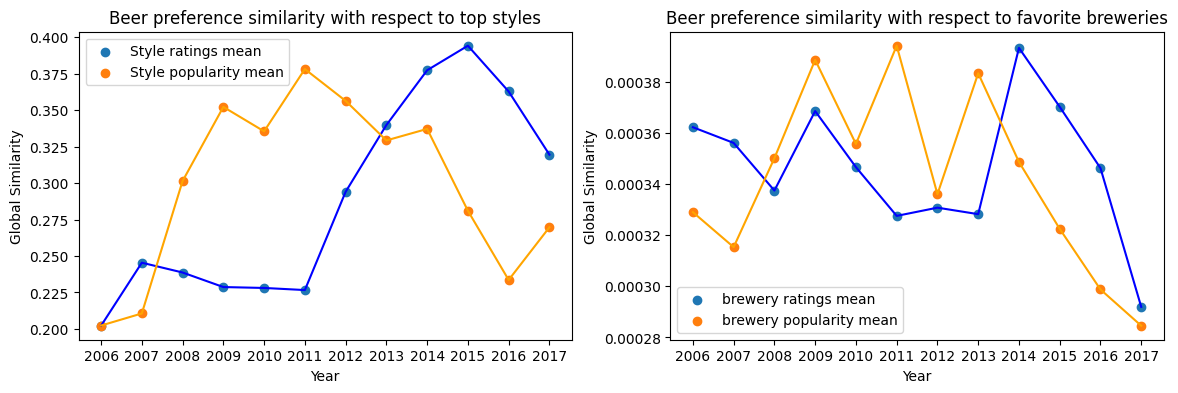

In [155]:
style_similarity_ratings = compute_similarity_countries (style_ratings_by_year, ll_dict, jaccard_flag = True )
style_similarity_popularity = compute_similarity_countries(style_popularities_by_year, ll_dict,  jaccard_flag = True)
brewery_similarity_popularity = compute_similarity_countries(bc_popularities_by_year, ll_dict, jaccard_flag = False)
brewery_similarity_ratings =compute_similarity_countries(bc_ratings_by_year, ll_dict, jaccard_flag = False)
# Get each of the ratings pairwise between two countries when we compare based on any of our 4 precomputed metrics


column_names = ['location 1', 'location 2'] + [str(x) for x in range(2006, 2018)] # Giving consistent labels for each dataframe
similarity_columns = column_names[2: ] # we are interested in all similarity differences between any two locations for each year 

# giving each dataframe these labels
style_similarity_ratings.columns = column_names
style_similarity_popularity.columns = column_names
brewery_similarity_popularity.columns = column_names
brewery_similarity_ratings.columns = column_names



style_ratings_mean = style_similarity_ratings[similarity_columns].mean().tolist()
style_popularity_mean = style_similarity_popularity[similarity_columns].mean().tolist()
brewery_popularity_mean = brewery_similarity_popularity[similarity_columns].mean().tolist()
brewery_ratings_mean = brewery_similarity_ratings[similarity_columns].mean().tolist()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))


axs[0].scatter(similarity_columns, style_ratings_mean, label='Style ratings mean')
axs[0].plot(similarity_columns, style_ratings_mean, linestyle='-', marker='', color='blue')

axs[0].scatter(similarity_columns, style_popularity_mean, label='Style popularity mean')
axs[0].plot(similarity_columns, style_popularity_mean, linestyle='-', marker='', color='orange')


# Customize the plot
axs[0].set_title('Beer preference similarity with respect to top styles')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Global Similarity')
axs[0].legend()





axs[1].scatter(similarity_columns, brewery_ratings_mean, label='brewery ratings mean')
axs[1].plot(similarity_columns, brewery_ratings_mean, linestyle='-', marker='', color='blue')

axs[1].scatter(similarity_columns, brewery_popularity_mean, label='brewery popularity mean')
axs[1].plot(similarity_columns, brewery_popularity_mean, linestyle='-', marker='', color='orange')


axs[1].set_title('Beer preference similarity with respect to favorite breweries')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Global Similarity')
axs[1].legend()


plt.show()


# Plotting the 4 global graphs DONE

# Putting the 3 line graphs more concisely moving the functions to helpers 

# Beer brotherhood where we look top at top 3 closest relations for each year 

# Investigate your graph at the bottom 

# Do T-tests 





## *Looking at factor of location to see if it plays a role in similarity*

In [100]:
us_state_populations = pd.read_csv('dataset/AdditionalData/US_state_populations.csv')
world_population = pd.read_csv("dataset/AdditionalData/world_population.csv")

#Contacenating the two datasets into one and creating a location-population dictionary:

us_state_populations.rename(columns = {'states': 'location'}, inplace = True)
populations_by_location = pd.concat([us_state_populations, world_population], ignore_index = True)
populations_by_location_dict = dict(zip(populations_by_location['location'], populations_by_location['2010']))

#Finding the portion (as percentage) of population for each location that are users in either of the websites. Then, we print the list of locations that are not present in the additional datasets. We see that all the locations are very small countries, so that exclusion of them will not be significant for our future analysis.

num_users_by_location = users['location'].value_counts().reset_index()
percentage_users_by_location = []
missing_locations = []
for index, row in num_users_by_location.iterrows():
    location = row['location']
    if location in populations_by_location_dict:
        percentage_users_by_location.append({'location': location, 'percentage': 100 * row['count'] / populations_by_location_dict[location], 'population': populations_by_location_dict[location], 'users': row['count']})
    else:
        missing_locations.append(location)

# Gets the relative distance between every two locations in KM that we are considering using Haversine distance (formula to calculate distance between two latitude and longitude points)
latitudes_longitudes = get_lat_long(pd.DataFrame(percentage_users_by_location))
location_distances_dict, location_df = get_location_df(latitudes_longitudes)
location_df



,"United States, California","United States, Pennsylvania","United States, New York","United States, Illinois","United States, Massachusetts","United States, Texas",Canada,"United States, Ohio","United States, Florida","United States, Michigan",...,"United States, Idaho","United States, Montana","United States, Alaska","United States, Hawaii","United States, North Dakota",Croatia,"United States, Wyoming",Northern Ireland,Iceland,Luxembourg
"United States, California",0.000000,3552.326937,3866.530542,2571.153846,4004.951531,1954.634315,2812.838572,3142.853522,3621.002712,2973.162506,...,870.428190,1403.352094,3702.099324,4032.957678,1922.491698,9809.535181,1192.887907,7968.884605,6825.690648,8996.221170
"United States, Pennsylvania",3552.326937,0.000000,314.369078,993.585872,498.189881,2150.884632,3025.700794,426.837717,1508.313085,643.204125,...,2974.961765,2622.285872,5134.699500,7583.233908,1951.333105,7138.588192,2462.128103,5256.793895,4550.129771,6283.974104
"United States, New York",3866.530542,314.369078,0.000000,1306.692620,247.576832,2433.926491,3220.710307,736.134907,1593.888355,936.620365,...,3280.879398,2915.022482,5335.381819,7897.019052,2238.177769,6909.851327,2770.694878,5041.720210,4400.658672,6058.185004
"United States, Illinois",2571.153846,993.585872,1306.692620,0.000000,1474.793721,1278.479719,2655.051895,573.396291,1553.439906,556.547317,...,2065.923217,1807.634735,4655.709614,6604.023708,1220.976690,7944.368427,1542.704390,6043.701727,5182.091791,7088.360485
"United States, Massachusetts",4004.951531,498.189881,247.576832,1474.793721,0.000000,2648.404725,3164.284000,921.058727,1835.719781,1036.934358,...,3379.745456,2984.625316,5275.993126,8025.753028,2301.717359,6667.541498,2879.906976,4796.463884,4155.345062,5815.078240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Croatia,9809.535181,7138.588192,6909.851327,7944.368427,6667.541498,9221.280638,7144.271882,7512.481458,8369.207604,7388.272921,...,8941.350196,8406.298231,7737.615519,12735.801456,7955.243341,0.000000,8685.090899,1901.909478,2990.526292,856.532972
"United States, Wyoming",1192.887907,2462.128103,2770.694878,1542.704390,2879.906976,1544.122668,1990.217949,2083.570878,2899.720603,1843.953268,...,523.322368,494.818458,3527.162354,5152.239161,738.358360,8685.090899,0.000000,6819.513340,5723.585890,7857.088851
Northern Ireland,7968.884605,5256.793895,5041.720210,6043.701727,4796.463884,7321.337309,5418.487290,5621.109484,6549.234384,5487.378655,...,7108.492110,6571.668023,6400.770662,11238.541541,6084.188573,1901.909478,6819.513340,0.000000,1309.384846,1048.906167
Iceland,6825.690648,4550.129771,4400.658672,5182.091791,4155.345062,6446.226737,4168.367187,4851.601963,5988.399710,4634.700053,...,5955.966443,5422.670297,5098.639920,9937.407490,5005.437309,2990.526292,5723.585890,1309.384846,0.000000,2216.835411


In [106]:
fifteen_closest_locations, fifteen_furthest_locations = k_closest_and_farthest_locations(15, all_differences_dict=location_distances_dict)

In [114]:
closest_style_ratings, farthest_style_ratings = get_group_similarities(ratings, style_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= True)
closest_style_popularity, farthest_style_popularity = get_group_similarities(ratings, style_popularities_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= True)
closest_bc_ratings, farthest_bc_ratings = get_group_similarities(ratings, bc_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= False)
closest_bc_pop, farthest_bc_pop = get_group_similarities(ratings, bc_popularities_by_year, k_closest_locs=fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag=False)



### Style Similarities Based on Location

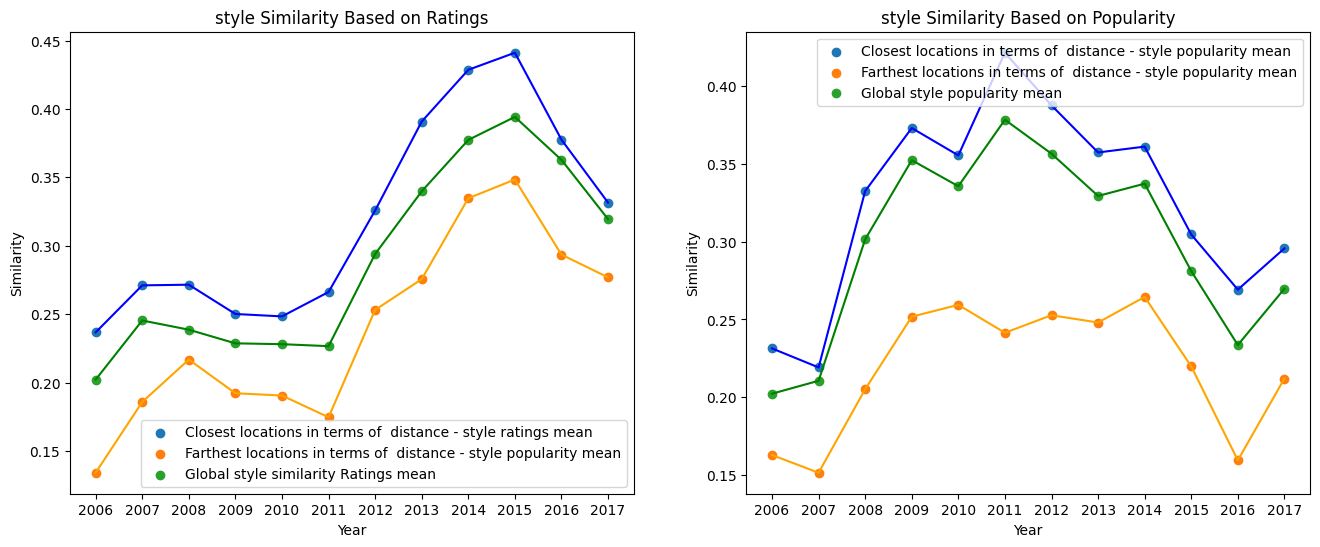

In [171]:
rename_colums = [str(x) for x in range(2006, 2018)]
closest_style_ratings.columns = farthest_style_ratings.columns = closest_style_popularity.columns = farthest_style_popularity.columns = closest_bc_ratings.columns = farthest_bc_ratings.columns = closest_bc_pop.columns = farthest_bc_pop.columns = rename_colums

plot_graphs(rename_colums, closest_style_ratings, farthest_style_ratings, style_similarity_ratings, closest_style_popularity, farthest_style_popularity, style_similarity_popularity, brewery_or_style = 'style', wealth_flag='distance')


In [235]:
print("T test for detecting if the means of the two areas are the same based on difference in location")
t_test_dataframe(rename_colums, closest_style_ratings, farthest_style_ratings, style_similarity_ratings, closest_style_popularity, farthest_style_popularity, style_similarity_popularity)


T test for detecting if the means of the two areas are the same based on difference in location


,year,closest vs furthest p value for rating,closest vs furthest p value based on consumption
0,2006,2.691971e-26,1.826288e-10
1,2007,8.975220e-19,8.984926e-12
2,2008,3.665886e-09,2.556468e-22
3,2009,7.700625e-12,4.657114e-14
4,2010,4.217451e-11,3.125766e-10
5,2011,6.648082e-22,1.922192e-26
6,2012,1.651866e-12,2.408662e-17
7,2013,1.603743e-34,5.925418e-13
8,2014,3.092901e-21,8.558170e-11
9,2015,1.788979e-15,1.560305e-11


**As we can see, the p value is extremely low in all years based on differences in both rating and consumption so we can say that location is statistically significant**

### *Top brewery similarity based on location*

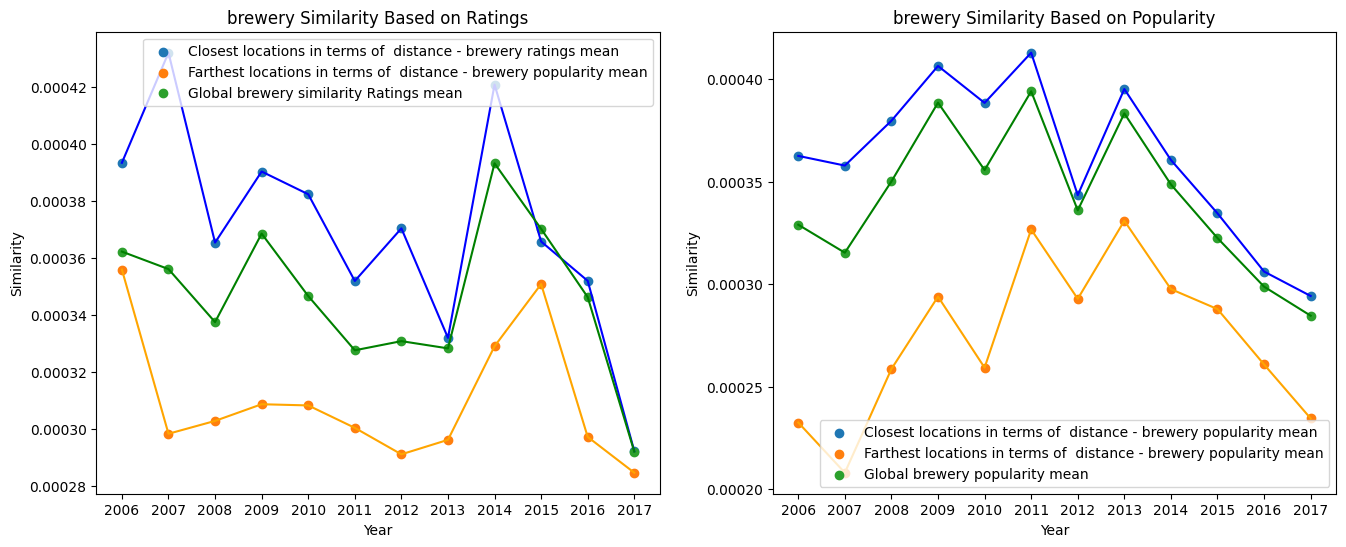

In [173]:
plot_graphs(rename_colums, closest_bc_ratings, farthest_bc_ratings, brewery_similarity_ratings, closest_bc_pop, farthest_bc_pop, brewery_similarity_popularity, brewery_or_style = 'brewery', wealth_flag='distance')

In [236]:
print("T test for detecting if the means of brewery preferences are the same based on difference in location")
t_test_dataframe(rename_colums, closest_bc_ratings, farthest_bc_ratings, brewery_similarity_ratings, closest_bc_pop, farthest_bc_pop, brewery_similarity_popularity)


T test for detecting if the means of brewery preferences are the same based on difference in location


,year,closest vs furthest p value for rating,closest vs furthest p value based on consumption
0,2006,2.594792e-02,3.371287e-22
1,2007,8.921580e-18,2.937367e-30
2,2008,2.427522e-05,4.628785e-16
3,2009,1.542935e-09,3.164782e-14
4,2010,3.115310e-07,9.905040e-20
5,2011,3.869678e-05,1.867284e-08
6,2012,6.848452e-09,2.052263e-04
7,2013,7.775567e-04,1.394356e-05
8,2014,3.092538e-12,2.035782e-06
9,2015,2.615200e-01,9.794435e-05


## *Looking at factor of wealth to see if it plays a role in similarity*

In [166]:
closest_and_furthest_distance = pd.read_csv('dataset/AdditionalData/Wealth_and_Lang.csv') # Reading in our wealth dataset which has the GDP per capita for each of our locations in 2008

wealth_dict = {}
for index, row in closest_and_furthest_distance.iterrows():
    wealth_dict[row['Location']] = row['Money in 2008']

wealth_differences_dict = {} #Calculating the 
for first_location in wealth_dict:
    wealth_differences_dict[first_location] = {}
    for second_location in wealth_dict:
        wealth_differences_dict[first_location][second_location] = abs(wealth_dict[first_location] - wealth_dict[second_location]) # Getting the absolute difference for wealth between any of our two specialized locations

pd.DataFrame(wealth_differences_dict)

,"United States, California","United States, Pennsylvania","United States, New York","United States, Illinois","United States, Massachusetts","United States, Texas",Canada,"United States, Ohio","United States, Florida","United States, Michigan",...,"United States, Idaho","United States, Montana","United States, Alaska","United States, Hawaii","United States, North Dakota",Croatia,"United States, Wyoming",Northern Ireland,Iceland,Luxembourg
"United States, California",0.000,7211.000,2759.000,1516.140,6665.000,4103.000,9208.000,9761.968,12564.636,14636.102,...,17031.232,14799.325,18210.120,2280.160,16438.100,40060.300,20390.537,24689.130,1025.400,64504.100
"United States, Pennsylvania",7211.000,0.000,9970.000,5694.860,13876.000,3108.000,1997.000,2550.968,5353.636,7425.102,...,9820.232,7588.325,25421.120,4930.840,23649.100,32849.300,27601.537,17478.130,8236.400,71715.100
"United States, New York",2759.000,9970.000,0.000,4275.140,3906.000,6862.000,11967.000,12520.968,15323.636,17395.102,...,19790.232,17558.325,15451.120,5039.160,13679.100,42819.300,17631.537,27448.130,1733.600,61745.100
"United States, Illinois",1516.140,5694.860,4275.140,0.000,8181.140,2586.860,7691.860,8245.828,11048.496,13119.962,...,15515.092,13283.185,19726.260,764.020,17954.240,38544.160,21906.677,23172.990,2541.540,66020.240
"United States, Massachusetts",6665.000,13876.000,3906.000,8181.140,0.000,10768.000,15873.000,16426.968,19229.636,21301.102,...,23696.232,21464.325,11545.120,8945.160,9773.100,46725.300,13725.537,31354.130,5639.600,57839.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Croatia,40060.300,32849.300,42819.300,38544.160,46725.300,35957.300,30852.300,30298.332,27495.664,25424.198,...,23029.068,25260.975,58270.420,37780.140,56498.400,0.000,60450.837,15371.170,41085.700,104564.400
"United States, Wyoming",20390.537,27601.537,17631.537,21906.677,13725.537,24493.537,29598.537,30152.505,32955.173,35026.639,...,37421.769,35189.862,2180.417,22670.697,3952.437,60450.837,0.000,45079.667,19365.137,44113.563
Northern Ireland,24689.130,17478.130,27448.130,23172.990,31354.130,20586.130,15481.130,14927.162,12124.494,10053.028,...,7657.898,9889.805,42899.250,22408.970,41127.230,15371.170,45079.667,0.000,25714.530,89193.230
Iceland,1025.400,8236.400,1733.600,2541.540,5639.600,5128.400,10233.400,10787.368,13590.036,15661.502,...,18056.632,15824.725,17184.720,3305.560,15412.700,41085.700,19365.137,25714.530,0.000,63478.700


In [167]:
fifteen_closest_locations, fifteen_furthest_locations = k_closest_and_farthest_locations(15, wealth_differences_dict) # Using the previous function to get the 5 closest locations and 5 furthest locations in terms of wealth

In [168]:
losest_style_ratings, farthest_style_ratings = get_group_similarities(ratings, style_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= True)
closest_style_popularity, farthest_style_popularity = get_group_similarities(ratings, style_popularities_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= True)
closest_bc_ratings, farthest_bc_ratings = get_group_similarities(ratings, bc_ratings_by_year, k_closest_locs= fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag= False)
closest_bc_pop, farthest_bc_pop = get_group_similarities(ratings, bc_popularities_by_year, k_closest_locs=fifteen_closest_locations, k_farthest_locs=fifteen_furthest_locations, ll_dict=ll_dict, jaccard_flag=False)



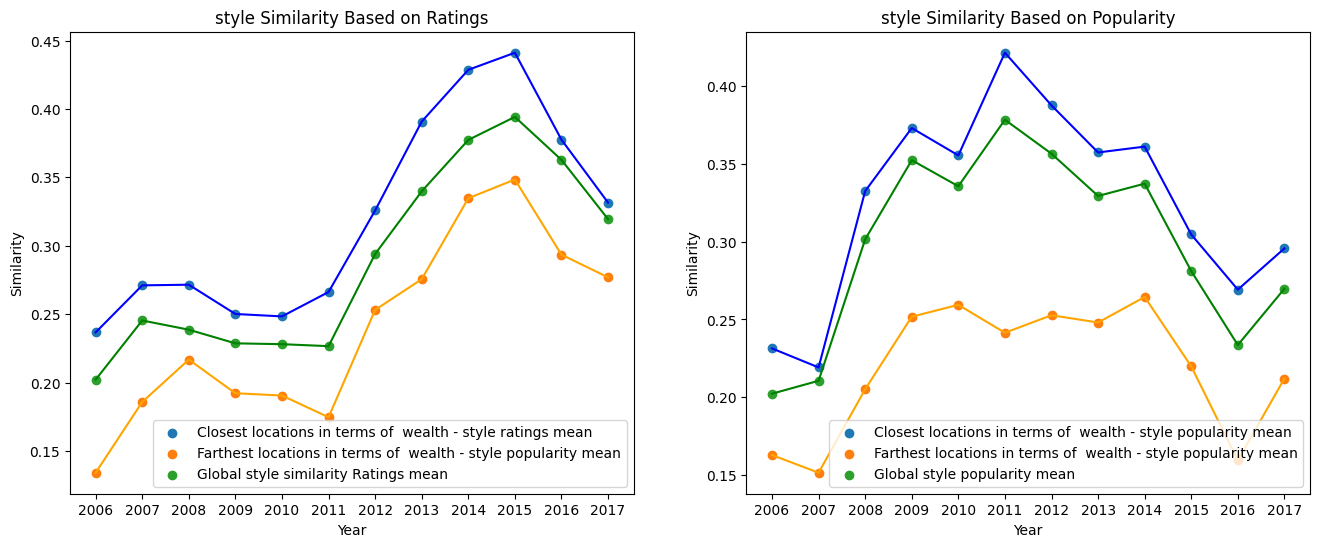

In [174]:
rename_colums = [str(x) for x in range(2006, 2018)]
closest_style_ratings.columns = farthest_style_ratings.columns = closest_style_popularity.columns = farthest_style_popularity.columns = closest_bc_ratings.columns = farthest_bc_ratings.columns = closest_bc_pop.columns = farthest_bc_pop.columns = rename_colums

plot_graphs(rename_colums, closest_style_ratings, farthest_style_ratings, style_similarity_ratings, closest_style_popularity, farthest_style_popularity, style_similarity_popularity, brewery_or_style = 'style', wealth_flag='wealth')


In [237]:
print("T test for detecting if the means of style preferences are the same based on wealth of each location")
t_test_dataframe(rename_colums, closest_style_ratings, farthest_style_ratings, style_similarity_ratings, closest_style_popularity, farthest_style_popularity, style_similarity_popularity)


T test for detecting if the means of style preferences are the same based on wealth of each location


,year,closest vs furthest p value for rating,closest vs furthest p value based on consumption
0,2006,2.691971e-26,1.826288e-10
1,2007,8.975220e-19,8.984926e-12
2,2008,3.665886e-09,2.556468e-22
3,2009,7.700625e-12,4.657114e-14
4,2010,4.217451e-11,3.125766e-10
5,2011,6.648082e-22,1.922192e-26
6,2012,1.651866e-12,2.408662e-17
7,2013,1.603743e-34,5.925418e-13
8,2014,3.092901e-21,8.558170e-11
9,2015,1.788979e-15,1.560305e-11


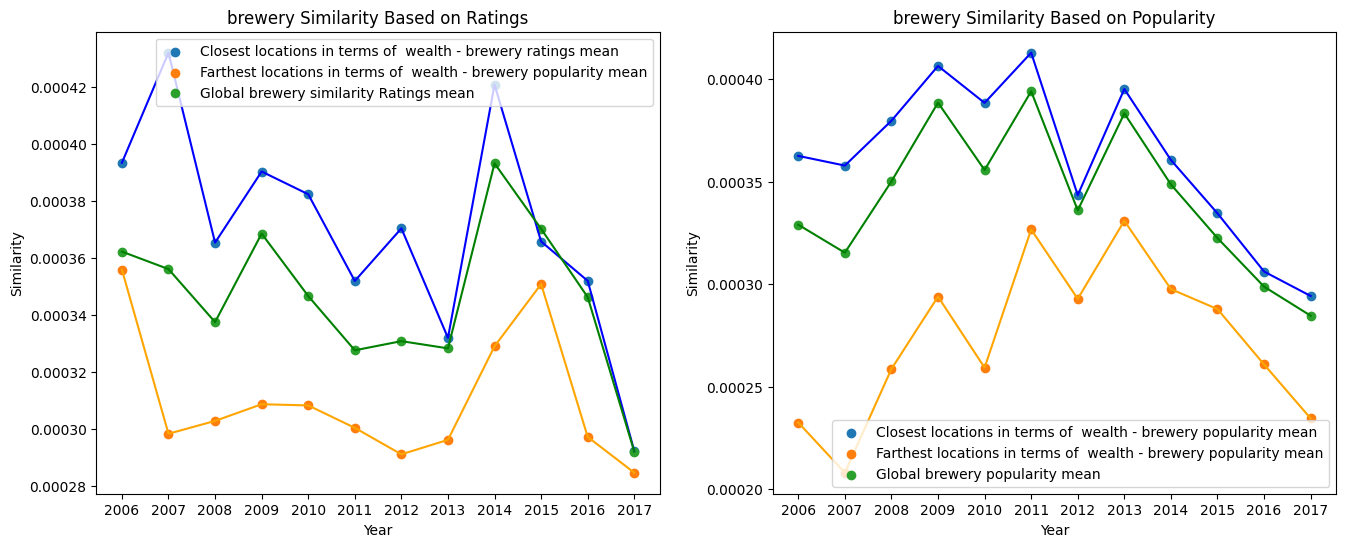

In [175]:
plot_graphs(rename_colums, closest_bc_ratings, farthest_bc_ratings, brewery_similarity_ratings, closest_bc_pop, farthest_bc_pop, brewery_similarity_popularity, brewery_or_style = 'brewery', wealth_flag='wealth')

In [238]:
print("T test for detecting if the means of brewery preferences are the same based on wealth")
t_test_dataframe(rename_colums, closest_bc_ratings, farthest_bc_ratings, brewery_similarity_ratings, closest_bc_pop, farthest_bc_pop, brewery_similarity_popularity)


T test for detecting if the means of brewery preferences are the same based on wealth


,year,closest vs furthest p value for rating,closest vs furthest p value based on consumption
0,2006,2.594792e-02,3.371287e-22
1,2007,8.921580e-18,2.937367e-30
2,2008,2.427522e-05,4.628785e-16
3,2009,1.542935e-09,3.164782e-14
4,2010,3.115310e-07,9.905040e-20
5,2011,3.869678e-05,1.867284e-08
6,2012,6.848452e-09,2.052263e-04
7,2013,7.775567e-04,1.394356e-05
8,2014,3.092538e-12,2.035782e-06
9,2015,2.615200e-01,9.794435e-05


### Beer brotherhood

Wouldn't it be interesting to see which locations have the closest similarities in terms of beer preferences for each year? Of course, we have to keep in mind that we have 4 beer similarity metrics so the way that we are going to do this to make sure we get a fair value is by standardizing each of the 4 metrics and adding them together for each pair of countries for each year. Then after that, we will see the countries with the highest similarity and point those out. 

In [225]:
style_similarity_ratings.columns

Index(['location 1', 'location 2', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [226]:
style_similarity_ratings_standardized = style_similarity_ratings.copy()
style_similarity_pop_standardized = style_similarity_popularity.copy()
bc_sim_ratings_standardized =brewery_similarity_ratings.copy()
bc_sim_pop_standardized =  brewery_similarity_popularity.copy()
final_res = pd.DataFrame()
final_res['location 1'] = style_similarity_ratings['location 1']
final_res['location 2'] = style_similarity_ratings['location 2']



for i in range(2006, 2018):
    string_year = str(i)
    style_similarity_ratings_standardized[string_year] = style_similarity_ratings_standardized[string_year].apply(lambda x:  (x - style_similarity_ratings_standardized[string_year].mean())/style_similarity_ratings_standardized[string_year].std() )
    style_similarity_pop_standardized[string_year] = style_similarity_pop_standardized[string_year].apply(lambda x:  (x - style_similarity_pop_standardized[string_year].mean())/style_similarity_pop_standardized[string_year].std() )
    bc_sim_ratings_standardized[string_year] = bc_sim_ratings_standardized[string_year].apply(lambda x:  (x - bc_sim_ratings_standardized[string_year].mean())/bc_sim_ratings_standardized[string_year].std() )
    bc_sim_pop_standardized[string_year] = bc_sim_pop_standardized[string_year].apply(lambda x:  (x - bc_sim_pop_standardized[string_year].mean())/bc_sim_pop_standardized[string_year].std() )
    final_res[string_year] = bc_sim_pop_standardized[string_year] + bc_sim_ratings_standardized[string_year] + style_similarity_pop_standardized[string_year]+style_similarity_ratings_standardized[string_year]



        



In [227]:
final_res

,location 1,location 2,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,Belgium,1.340360,1.256720,-0.898360,0.613054,-0.214226,-0.869783,0.342898,-3.164786,-3.393508,-3.339684,-3.055023,-3.298954
1,Australia,Brazil,-1.025632,-1.342796,2.714810,-2.676441,-2.238287,-2.840302,-2.522710,-1.900681,-1.533762,-1.802057,-1.055595,0.899170
2,Australia,Canada,0.410442,3.452659,0.512989,3.026682,3.131745,-0.886999,0.604215,1.536251,2.177692,-0.877325,-0.623724,-2.518198
3,Australia,Croatia,-1.271540,-1.502625,0.350889,-1.119305,-1.919252,-2.177888,-3.232099,-3.417739,-1.442560,1.142882,0.521892,1.660620
4,Australia,Denmark,0.276070,2.671915,2.514123,0.844191,-0.611944,-1.656947,0.202891,-2.416529,0.762156,-2.443147,-1.456751,-2.745374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,"United States, Washington","United States, Wisconsin",2.663049,2.857697,3.766622,0.434980,1.698884,3.418784,0.424970,2.342148,5.040399,2.565476,4.040905,2.203817
2481,"United States, Washington","United States, Wyoming",0.090577,-0.405173,-0.749018,0.201573,-2.018893,1.990057,3.464031,-0.283600,0.407430,-0.071576,-1.941886,-0.904095
2482,"United States, West Virginia","United States, Wisconsin",0.669647,-1.864894,-0.803660,0.124315,-0.602118,-1.633360,-1.078847,-0.798399,-0.070357,-0.359340,-3.128374,-0.358532
2483,"United States, West Virginia","United States, Wyoming",1.963969,1.754112,1.163234,1.680366,-0.940775,-1.230774,1.698431,-0.700244,-0.626576,4.202721,-0.213753,-0.204239


In [231]:
top_k_similarities = 30
top_similarity_df = {'year': [], 'country 1' : [], 'country 2': [], 'standardized similarity' : []}
for year in range(2006, 2018):
    string_year = str(year)
    top_k_indices = final_res['2006'].nlargest(top_k_similarities).index
    top_result_idx = top_k_indices[13] # This is where we can put it in the similarity of the location that people would want to pick -> eg. we are looking at the 13th strongest similarity for each year in this case
    top_similarity_df['year'].append(string_year)
    top_similarity_df['country 1'].append(style_similarity_ratings.iloc[top_result_idx, 0])
    top_similarity_df['country 2'].append(style_similarity_ratings.iloc[top_result_idx, 1])
    top_similarity_df['standardized similarity'].append(final_res.iloc[top_result_idx, year - 2006 + 2])
pd.DataFrame(top_similarity_df)








,year,country 1,country 2,standardized similarity
0,2006,"United States, Florida","United States, Texas",6.966241
1,2007,"United States, Florida","United States, Texas",4.028029
2,2008,"United States, Florida","United States, Texas",2.358709
3,2009,"United States, Florida","United States, Texas",6.620341
4,2010,"United States, Florida","United States, Texas",2.100311
5,2011,"United States, Florida","United States, Texas",1.770482
6,2012,"United States, Florida","United States, Texas",2.902299
7,2013,"United States, Florida","United States, Texas",1.195608
8,2014,"United States, Florida","United States, Texas",3.003556
9,2015,"United States, Florida","United States, Texas",4.220423
